In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')


from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
df=pd.read_csv('blogs_categories.csv')

In [9]:
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [14]:
df.isnull().sum()

Unnamed: 0    0
Data          0
Labels        0
dtype: int64

In [15]:
def preprocess_text(text):
    text=text.lower()
    text=re.sub(r'[^\w\s]','',text)
    tokens=nltk.word_tokenize(text)
    stopwords_list=set(stopwords.words('english'))
    tokens=[word for word in tokens if word not in stopwords_list]
    text=' '.join(tokens)
    return text

In [16]:
df['Cleaned_text']=df['Data'].apply(preprocess_text)

In [17]:
tfidf_vectorizer=TfidfVectorizer(max_features=5000)
tfidf_vectorizer

TfidfVectorizer(max_features=5000)

In [18]:
x=tfidf_vectorizer.fit_transform(df['Cleaned_text'])

In [19]:
x

<19997x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1823934 stored elements in Compressed Sparse Row format>

In [20]:
y=df['Labels']

In [21]:
y

0               alt.atheism
1               alt.atheism
2               alt.atheism
3               alt.atheism
4               alt.atheism
                ...        
19992    talk.religion.misc
19993    talk.religion.misc
19994    talk.religion.misc
19995    talk.religion.misc
19996    talk.religion.misc
Name: Labels, Length: 19997, dtype: object

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=100)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4999, 5000)
(4999,)
(14998, 5000)
(14998,)


In [24]:
naive_bayes_classifier=MultinomialNB()
naive_bayes_classifier.fit(x_train,y_train)

MultinomialNB()

In [25]:
y_pred=naive_bayes_classifier.predict(x_test)

In [26]:
y_pred

array(['sci.med', 'talk.politics.misc', 'comp.sys.mac.hardware', ...,
       'comp.os.ms-windows.misc', 'rec.sport.hockey',
       'comp.sys.mac.hardware'], dtype='<U24')

In [27]:
accuracy_score(y_test,y_pred)

0.853047072943059

In [28]:
classification_report(y_test,y_pred)

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.76      0.79      0.78       750\n           comp.graphics       0.81      0.84      0.83       741\n comp.os.ms-windows.misc       0.70      0.88      0.78       735\ncomp.sys.ibm.pc.hardware       0.77      0.80      0.78       750\n   comp.sys.mac.hardware       0.84      0.91      0.87       733\n          comp.windows.x       0.89      0.88      0.88       745\n            misc.forsale       0.87      0.83      0.85       762\n               rec.autos       0.90      0.87      0.89       753\n         rec.motorcycles       0.96      0.93      0.95       757\n      rec.sport.baseball       0.97      0.96      0.97       756\n        rec.sport.hockey       0.98      0.97      0.98       758\n               sci.crypt       0.93      0.95      0.94       741\n         sci.electronics       0.90      0.76      0.83       752\n                 sci.med       0.98      0.89      0.93    

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [30]:
!python -m nltk.downloader vader_lexicon

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
sid=SentimentIntensityAnalyzer()

In [33]:
sentiments =[]
for text in df['Data']:
    sentiment_score=sid.polarity_scores(text)
    if sentiment_score['compound']>0:
        sentiments.append('positive')
    elif sentiment_score['compound']<0:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

In [34]:
df['Sentiment']=sentiments

In [37]:
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)
print("\nSentiment Distribution Across Categories:")
print(sentiment_distribution)


Sentiment Distribution Across Categories:
Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                    379        8       613
comp.graphics                  123       47       830
comp.os.ms-windows.misc        204       45       751
comp.sys.ibm.pc.hardware       218       19       763
comp.sys.mac.hardware          243       47       710
comp.windows.x                 226       40       734
misc.forsale                   126       70       804
rec.autos                      304       28       668
rec.motorcycles                311       20       669
rec.sport.baseball             228       39       733
rec.sport.hockey               259       16       725
sci.crypt                      300        7       693
sci.electronics                178       36       786
sci.med                        346       22       632
sci.space                      271       21       708
soc.religion.christian         260     

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [39]:
accuracy=accuracy_score(y_test,y_pred)

In [40]:
accuracy

0.853047072943059

In [41]:
precision=precision_score(y_test,y_pred,average='weighted')

In [42]:
precision

0.8567915615927318

In [43]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.853047072943059

In [44]:
f=f1_score(y_test,y_pred,average='weighted')

In [45]:
f

0.8512460230617622

In [46]:
import seaborn as sns

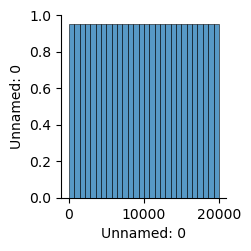

In [47]:
sns.pairplot(df)